# properties of each water mass and how they vary

In [36]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

# for anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
def organize(s_t, do_no3, ta_dic, region, final=True):
    # make dictionary of transport and tracer concentrations of each water parcel within a specified region
    
    # the region is based on the boolean input into the function defined here
    # region options are salish, cuc, offshore deep, offshore surface, north, south, fresh, loop
    mydata= s_t
    # boundary definitions
    bdy_loo = 0
    bdy_sou = 2
    bdy_off = 3
    bdy_nor = 4
    saltdiv = 32
    sdiv = 33.5
    if region == 'salish':
        boolean = ((abs(mydata.init_t-mydata.final_t) > 24) & ~np.isnan(mydata.final_section))
    elif region == 'cuc':
        boolean = (mydata.final_section==bdy_sou) & (mydata.final_salt >= sdiv)
    elif region == 'offshore deep':
        boolean = (mydata.final_section==bdy_off) & (mydata.final_depth > 120)
    elif region == 'offshore surface':
        boolean = (mydata.final_section==bdy_off) & (mydata.final_depth <=120)
    elif region == 'north':
        boolean = (mydata.final_section==bdy_nor)
    elif region == 'south':
        boolean = (mydata.final_section==bdy_sou) & (mydata.final_salt >= saltdiv) & (mydata.final_salt < sdiv)
    elif region == 'fresh':
        boolean = ((mydata.final_section==bdy_sou) & (mydata.final_salt < saltdiv))
    elif region == 'loop':
        boolean = (mydata.final_section==bdy_loo) & (abs(mydata.init_t-mydata.final_t) > 24)
    else:
        print('not in the list of regions, options are: salish, cuc, offshore deep, offshore surface, north, south, fresh, loop')
    


    if final==True: # ie. looking at the water parcels at the outer boundaries
        # get data
        transport = mydata.init_transp[boolean].values
        salt = mydata.init_salt[boolean].values
        temp = mydata.init_temp[boolean].values
        mydata = do_no3
        NO3 = mydata.init_salt[boolean].values
        DO = mydata.init_temp[boolean].values
        mydata = ta_dic
        DIC = mydata.init_salt[boolean].values
        TA = mydata.init_temp[boolean].values
    else: # ie. looking at the water parcels at the JdF boundary
        # get data
        transport = mydata.final_transp[boolean].values
        salt = mydata.final_salt[boolean].values
        temp = mydata.final_temp[boolean].values
        mydata = do_no3
        NO3 = mydata.final_salt[boolean].values
        DO = mydata.final_temp[boolean].values
        mydata = ta_dic
        DIC = mydata.final_salt[boolean].values
        TA = mydata.final_temp[boolean].values

    # set up dictionary
    d = {'transport':transport,'salt':salt,'temp':temp,'DO':DO,'NO3':NO3,'TA':TA,'DIC':DIC}
    df = pd.DataFrame(d)

    return df

## Properties into JdF

In [ ]:
region = 'salish'
final = False

up13 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20131024/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20131024/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20131024/ariane_positions_quantitative.nc'),
             region, final)

up14 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20140903/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20140903/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20140903/ariane_positions_quantitative.nc'),
             region, final)

up15 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20150905/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20150905/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20150905/ariane_positions_quantitative.nc'),
             region, final)

up16 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20160913/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20160913/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20160913/ariane_positions_quantitative.nc'),
             region, final)

up17 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20171012/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20171012/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20171012/ariane_positions_quantitative.nc'),
             region, final)

up18 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20180906/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20180906/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20180906/ariane_positions_quantitative.nc'),
             region, final)

up21 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20210922/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20210922/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20210922/ariane_positions_quantitative.nc'),
             region, final)

up22 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20221015/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20221015/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20221015/ariane_positions_quantitative.nc'),
             region, final)

In [6]:
dw13 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20140306/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20140306/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20140306/ariane_positions_quantitative.nc'),
             region, final)

dw15 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20160319/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20160319/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20160319/ariane_positions_quantitative.nc'),
             region, final)

dw16 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20170419/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20170419/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20170419/ariane_positions_quantitative.nc'),
             region, final)

dw17 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20180201/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20180201/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20180201/ariane_positions_quantitative.nc'),
             region, final)

dw19 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20200127/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20200127/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20200127/ariane_positions_quantitative.nc'),
             region, final)

dw20 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20210202/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20210202/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20210202/ariane_positions_quantitative.nc'),
             region, final)

dw21 = organize(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20220125/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20220125/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20220125/ariane_positions_quantitative.nc'),
             region, final)

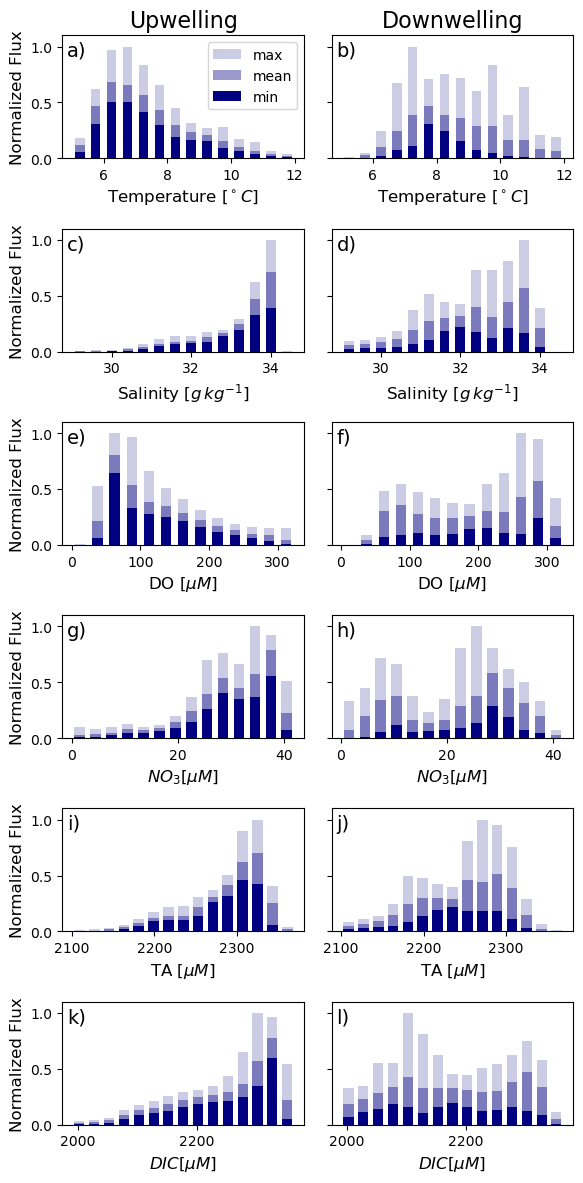

In [7]:
fig, ax = plt.subplots(6, 2, figsize = (6, 12))
plt.rcParams['font.size'] = 12

#TEMPERATURE
bins = np.arange(5,12.5,0.5)
#plt upwelling
h,x,_ = ax[0,0].hist([up13.temp,up14.temp,up15.temp,up16.temp,up17.temp,up18.temp,up21.temp,up22.temp], bins=bins,
                             weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[0,0].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0,0].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0,0].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[0,0].set_title('Upwelling', fontsize = 16)
ax[0,0].set_ylabel('Normalized Flux', fontsize = 12)
ax[0,0].set_xlabel('Temperature [$^\circ C$]', fontsize = 12)
ax[0,0].set_ylim([0,1.1])
ax[0,0].legend(fontsize = 10)

#plt downwelling
h,x,_ = ax[0,1].hist([dw13.temp,dw15.temp,dw16.temp,dw17.temp,dw19.temp,dw20.temp,dw21.temp], bins=bins,
                             weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[0,1].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0,1].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0,1].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[0,1].set_title('Downwelling', fontsize = 16)
ax[0,1].set_yticklabels([])
ax[0,1].set_xlabel('Temperature [$^\circ C$]', fontsize = 12)
ax[0,1].set_ylim([0,1.1])
# ax[1].legend(fontsize = 12)

#SALINITY
bins = np.arange(29,34.8,0.4)
#plt upwelling
h,x,_ = ax[1,0].hist([up13.salt,up14.salt,up15.salt,up16.salt,up17.salt,up18.salt,up21.salt,up22.salt], bins=bins, 
                           weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[1,0].bar(bin_centers,maxi,width = 0.25,color='navy',alpha=0.2,label='max')
ax[1,0].bar(bin_centers,mean,width = 0.25, color='navy',alpha=0.4,label='mean')
ax[1,0].bar(bin_centers, mini,width = 0.25, color='navy',label='min')

# ax[0].set_title('Winter')
ax[1,0].set_ylabel('Normalized Flux', fontsize=12)
ax[1,0].set_xlabel('Salinity [$g \, kg^{-1}$]', fontsize=12)
ax[1,0].set_ylim([0,1.1])

#plt downwelling
h,x,_ = ax[1,1].hist([dw13.salt,dw15.salt,dw16.salt,dw17.salt,dw19.salt,dw20.salt,dw21.salt], bins=bins, 
                           weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[1,1].bar(bin_centers,maxi,width = 0.25,color='navy',alpha=0.2,label='max')
ax[1,1].bar(bin_centers,mean,width = 0.25, color='navy',alpha=0.4,label='mean')
ax[1,1].bar(bin_centers, mini,width = 0.25, color='navy',label='min')


ax[1,1].set_yticklabels([])#,fontsize=14)
ax[1,1].set_xlabel('Salinity [$g \, kg^{-1}$]', fontsize=12)
ax[1,1].set_ylim([0,1.1])

#DO
bins = np.arange(0,350,25)
#plt upwelling
h,x,_ = ax[2,0].hist([up13.DO,up14.DO,up15.DO,up16.DO,up17.DO,up18.DO,up21.DO,up22.DO], bins=bins,
                             weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[2,0].bar(bin_centers,maxi,width = 15,color='navy',alpha=0.2,label='max')
ax[2,0].bar(bin_centers,mean,width = 15, color='navy',alpha=0.4,label='mean')
ax[2,0].bar(bin_centers, mini,width = 15, color='navy',label='min')

ax[2,0].set_ylabel('Normalized Flux', fontsize = 12)
ax[2,0].set_xlabel('DO [$\mu M$]', fontsize = 12)
ax[2,0].set_ylim([0,1.1])
# ax[2,0].legend(fontsize = 10)

#plt downwelling
h,x,_ = ax[2,1].hist([dw13.DO,dw15.DO,dw16.DO,dw17.DO,dw19.DO,dw20.DO,dw21.DO], bins=bins,
                             weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[2,1].bar(bin_centers,maxi,width = 15,color='navy',alpha=0.2,label='max')
ax[2,1].bar(bin_centers,mean,width = 15, color='navy',alpha=0.4,label='mean')
ax[2,1].bar(bin_centers, mini,width = 15, color='navy',label='min')

ax[2,1].set_yticklabels([])
ax[2,1].set_xlabel('DO [$\mu M$]', fontsize = 12)
ax[2,1].set_ylim([0,1.1])
# ax[1].legend(fontsize = 12)

#NO3
bins = np.arange(0,45,3)
#plt upwelling
h,x,_ = ax[3,0].hist([up13.NO3,up14.NO3,up15.NO3,up16.NO3,up17.NO3,up18.NO3,up21.NO3,up22.NO3], bins=bins, 
                           weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[3,0].bar(bin_centers,maxi,width = 2,color='navy',alpha=0.2,label='max')
ax[3,0].bar(bin_centers,mean,width = 2, color='navy',alpha=0.4,label='mean')
ax[3,0].bar(bin_centers, mini,width = 2, color='navy',label='min')

# ax[0].set_title('Winter')
ax[3,0].set_ylabel('Normalized Flux', fontsize=12)
ax[3,0].set_xlabel('$NO_3 [\mu M$]', fontsize=12)
ax[3,0].set_ylim([0,1.1])

#plt downwelling
h,x,_ = ax[3,1].hist([dw13.NO3,dw15.NO3,dw16.NO3,dw17.NO3,dw19.NO3,dw20.NO3,dw21.NO3], bins=bins, 
                           weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[3,1].bar(bin_centers,maxi,width = 2,color='navy',alpha=0.2,label='max')
ax[3,1].bar(bin_centers,mean,width = 2, color='navy',alpha=0.4,label='mean')
ax[3,1].bar(bin_centers, mini,width = 2, color='navy',label='min')


ax[3,1].set_yticklabels([])#,fontsize=14)
ax[3,1].set_xlabel('$NO_3 [\mu M$]', fontsize=12)
ax[3,1].set_ylim([0,1.1])

#TA
bins = np.arange(2100,2380,18)
#plt upwelling
h,x,_ = ax[4,0].hist([up13.TA,up14.TA,up15.TA,up16.TA,up17.TA,up18.TA,up21.TA,up22.TA], bins=bins,
                             weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[4,0].bar(bin_centers,maxi,width = 13,color='navy',alpha=0.2,label='max')
ax[4,0].bar(bin_centers,mean,width = 13, color='navy',alpha=0.4,label='mean')
ax[4,0].bar(bin_centers, mini,width = 13, color='navy',label='min')

ax[4,0].set_ylabel('Normalized Flux', fontsize = 12)
ax[4,0].set_xlabel('TA [$\mu M$]', fontsize = 12)
ax[4,0].set_ylim([0,1.1])
# ax[2,0].legend(fontsize = 10)

#plt downwelling
h,x,_ = ax[4,1].hist([dw13.TA,dw15.TA,dw16.TA,dw17.TA,dw19.TA,dw20.TA,dw21.TA], bins=bins,
                             weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[4,1].bar(bin_centers,maxi,width = 13,color='navy',alpha=0.2,label='max')
ax[4,1].bar(bin_centers,mean,width = 13, color='navy',alpha=0.4,label='mean')
ax[4,1].bar(bin_centers, mini,width = 13, color='navy',label='min')

ax[4,1].set_yticklabels([])
ax[4,1].set_xlabel('TA [$\mu M$]', fontsize = 12)
ax[4,1].set_ylim([0,1.1])
# ax[1].legend(fontsize = 12)

#DIC
bins = np.arange(1990,2380,25)
#plt upwelling
h,x,_ = ax[5,0].hist([up13.DIC,up14.DIC,up15.DIC,up16.DIC,up17.DIC,up18.DIC,up21.DIC,up22.DIC], bins=bins, 
                           weights= [up13.transport,up14.transport,up15.transport,up16.transport,up17.transport,up18.transport,up21.transport,up22.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[5,0].bar(bin_centers,maxi,width = 17,color='navy',alpha=0.2,label='max')
ax[5,0].bar(bin_centers,mean,width = 17, color='navy',alpha=0.4,label='mean')
ax[5,0].bar(bin_centers, mini,width = 17, color='navy',label='min')

ax[5,0].set_ylabel('Normalized Flux', fontsize=12)
ax[5,0].set_xlabel('$DIC [\mu M$]', fontsize=12)
ax[5,0].set_ylim([0,1.1])

#plt downwelling
h,x,_ = ax[5,1].hist([dw13.DIC,dw15.DIC,dw16.DIC,dw17.DIC,dw19.DIC,dw20.DIC,dw21.DIC], bins=bins, 
                           weights= [dw13.transport,dw15.transport,dw16.transport,dw17.transport,dw19.transport,dw20.transport,dw21.transport], alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(h,axis=0)/np.max(h)
mini = np.min(h,axis=0)/np.max(h)
maxi = np.max(h,axis=0)/np.max(h)

ax[5,1].bar(bin_centers,maxi,width = 17,color='navy',alpha=0.2,label='max')
ax[5,1].bar(bin_centers,mean,width = 17, color='navy',alpha=0.4,label='mean')
ax[5,1].bar(bin_centers, mini,width = 17, color='navy',label='min')


ax[5,1].set_yticklabels([])#,fontsize=14)
ax[5,1].set_xlabel('$DIC [\mu M$]', fontsize=12)
ax[5,1].set_ylim([0,1.1])

#labels#labels#labels
ax[0,0].text(.02, .8, 'a)', ha='left', va='bottom', transform=ax[0,0].transAxes, fontsize=14)
ax[0,1].text(.02, .8, 'b)', ha='left', va='bottom', transform=ax[0,1].transAxes, fontsize=14)
ax[1,0].text(.02, .8, 'c)', ha='left', va='bottom', transform=ax[1,0].transAxes, fontsize=14)
ax[1,1].text(.02, .8, 'd)', ha='left', va='bottom', transform=ax[1,1].transAxes, fontsize=14)
ax[2,0].text(.02, .8, 'e)', ha='left', va='bottom', transform=ax[2,0].transAxes, fontsize=14)
ax[2,1].text(.02, .8, 'f)', ha='left', va='bottom', transform=ax[2,1].transAxes, fontsize=14)
ax[3,0].text(.02, .8, 'g)', ha='left', va='bottom', transform=ax[3,0].transAxes, fontsize=14)
ax[3,1].text(.02, .8, 'h)', ha='left', va='bottom', transform=ax[3,1].transAxes, fontsize=14)
ax[4,0].text(.02, .8, 'i)', ha='left', va='bottom', transform=ax[4,0].transAxes, fontsize=14)
ax[4,1].text(.02, .8, 'j)', ha='left', va='bottom', transform=ax[4,1].transAxes, fontsize=14)
ax[5,0].text(.02, .8, 'k)', ha='left', va='bottom', transform=ax[5,0].transAxes, fontsize=14)
ax[5,1].text(.02, .8, 'l)', ha='left', va='bottom', transform=ax[5,1].transAxes, fontsize=14)

plt.tight_layout()

## interannual variability

In [3]:
up13 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2013.csv')
up14 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2014.csv')
up15 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2015.csv')
up16 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2016.csv')
up17 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2017.csv')
up18 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2018.csv')
up21 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2021.csv')
up22 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2022.csv')

dw13 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2014.csv')
dw15 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2016.csv')
dw16 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2017.csv')
dw17 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2018.csv')
dw19 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2020.csv')
dw20 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2021.csv')
dw21 = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2022.csv')

In [4]:
def interannual(region, property, updown):
    if updown == 'up':
        files = [up13, up14, up15, up16, up17, up18, up21, up22]
    elif updown == 'down':
        files = [dw13, dw15, dw16, dw17, dw19, dw20, dw21]
    elif updown == 'both':
        files = [up13, dw13, up14, up15, dw15, up16, dw16, up17, dw17, up18, dw19, dw20, up21, dw21, up22]

    data = np.zeros(len(files))
    i = 0
    for file in files:
        data[i] = file[property][file.regions == region]
        i+=1
    return data

/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


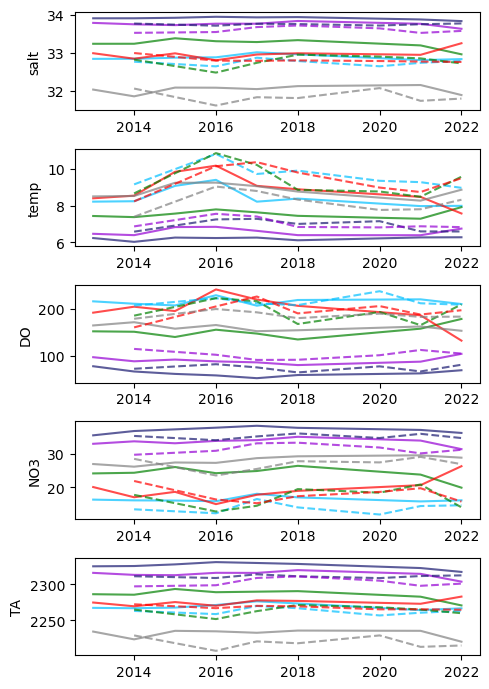

In [5]:
upyears = [2013, 2014, 2015, 2016, 2017, 2018, 2021, 2022]
downyears = [2014, 2016, 2017, 2018, 2020, 2021, 2022]
properties = ['salt','temp','DO','NO3','TA','DIC']

fig, ax = plt.subplots(5,1,figsize=(5,7))

for i in range(len(ax)):
    ax[i].plot(upyears, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.7)
    ax[i].plot(upyears, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.7)
    ax[i].plot(upyears, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.7)
    ax[i].plot(upyears, interannual('north', properties[i], 'up'),c='green',alpha=0.7)
    ax[i].plot(upyears, interannual('south', properties[i], 'up'),c='red',alpha=0.7)
    # ax[i].plot(upyears, interannual('fresh', properties[i], 'up'),c='magenta',alpha=0.7)
    ax[i].plot(upyears, interannual('loop', properties[i], 'up'),c='grey',alpha=0.7)
    ax[i].plot(downyears, interannual('cuc', properties[i], 'down'),ls='dashed',c='midnightblue',alpha=0.7)
    ax[i].plot(downyears, interannual('offshore deep', properties[i], 'down'),ls='dashed',c='darkviolet',alpha=0.7)
    ax[i].plot(downyears, interannual('offshore surface', properties[i], 'down'),ls='dashed',c='deepskyblue',alpha=0.7)
    ax[i].plot(downyears, interannual('north', properties[i], 'down'),ls='dashed',c='green',alpha=0.7)
    ax[i].plot(downyears, interannual('south', properties[i], 'down'),ls='dashed',c='red',alpha=0.7)
    # ax[i].plot(downyears, interannual('fresh', properties[i], 'down'),ls='dashed',c='magenta',alpha=0.7)
    ax[i].plot(downyears, interannual('loop', properties[i], 'down'),ls='dashed',c='grey',alpha=0.7)

    ax[i].set_ylabel(properties[i])

plt.tight_layout()

/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


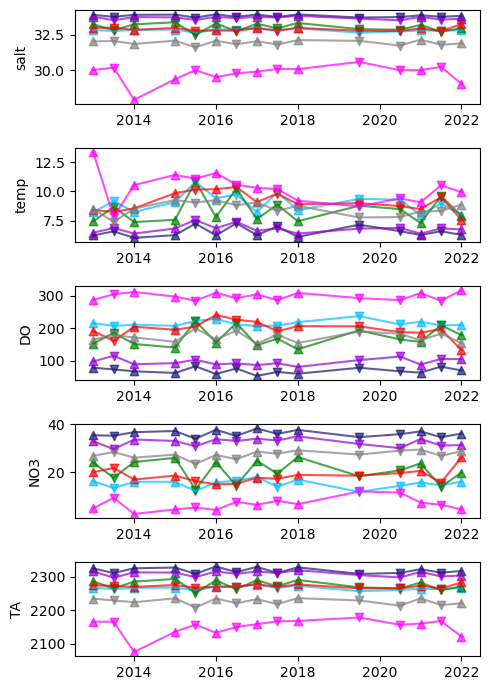

In [6]:
updownyears = np.sort(np.append(np.array(upyears),(np.array(downyears) - 0.5)))
properties = ['salt','temp','DO','NO3','TA','DIC']

fig, ax = plt.subplots(5,1,figsize=(5,7))

for i in range(len(ax)):
    ax[i].scatter(upyears, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('north', properties[i], 'up'),c='green',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('south', properties[i], 'up'),c='red',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('fresh', properties[i], 'up'),c='magenta',alpha=0.7,marker='^')
    ax[i].scatter(upyears, interannual('loop', properties[i], 'up'),c='grey',alpha=0.7,marker='^')

    ax[i].scatter(np.array(downyears) - 0.5, interannual('cuc', properties[i], 'down'),c='midnightblue',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('offshore deep', properties[i], 'down'),c='darkviolet',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('offshore surface', properties[i], 'down'),c='deepskyblue',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('north', properties[i], 'down'),c='green',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('south', properties[i], 'down'),c='red',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('fresh', properties[i], 'down'),c='magenta',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears) - 0.5, interannual('loop', properties[i], 'down'),c='grey',alpha=0.7,marker='v')

    ax[i].plot(updownyears, interannual('cuc', properties[i], 'both'),c='midnightblue',alpha=0.7)
    ax[i].plot(updownyears, interannual('offshore deep', properties[i], 'both'),c='darkviolet',alpha=0.7)
    ax[i].plot(updownyears, interannual('offshore surface', properties[i], 'both'),c='deepskyblue',alpha=0.7)
    ax[i].plot(updownyears, interannual('north', properties[i], 'both'),c='green',alpha=0.7)
    ax[i].plot(updownyears, interannual('south', properties[i], 'both'),c='red',alpha=0.7)
    ax[i].plot(updownyears, interannual('fresh', properties[i], 'both'),c='magenta',alpha=0.7)
    ax[i].plot(updownyears, interannual('loop', properties[i], 'both'),c='grey',alpha=0.7)

    ax[i].set_ylabel(properties[i])

plt.tight_layout()

/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a 

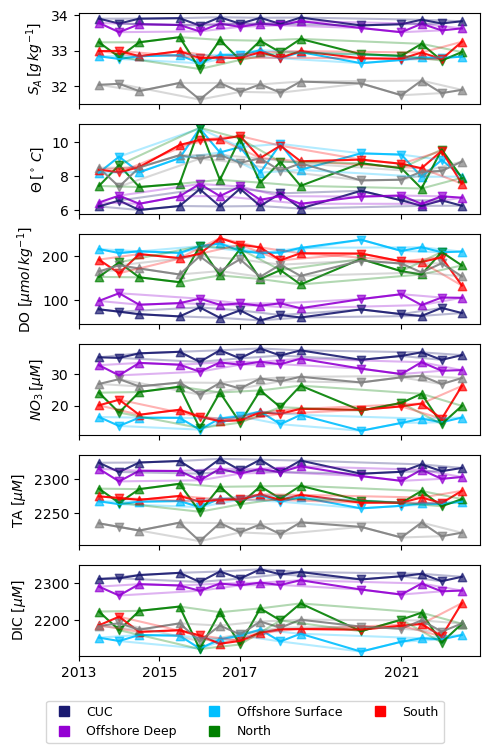

In [7]:
# don't actually keep fresh for final publication... too different from other water masses it makes the y-axis range bad
updownyears = np.sort(np.append(np.array(upyears)+0.5,(np.array(downyears))))
properties = ['salt','temp','DO','NO3','TA','DIC']
prop_names = ['$S_A \,[g\, kg^{-1}]$','$\Theta \,[^\circ \, C]$','DO $[\mu mol \, kg^{-1}]$','$NO_3 \, [\mu M]$','TA $[\mu M]$','DIC $[\mu M]$']

fig, ax = plt.subplots(6,1,figsize=(5,7))

for i in range(len(ax)):

    ax[i].plot(updownyears, interannual('cuc', properties[i], 'both'),c='midnightblue',alpha=0.9)
    ax[i].plot(updownyears, interannual('offshore deep', properties[i], 'both'),c='darkviolet',alpha=0.9)
    ax[i].plot(updownyears, interannual('offshore surface', properties[i], 'both'),c='deepskyblue',alpha=0.9)
    ax[i].plot(updownyears, interannual('north', properties[i], 'both'),c='green',alpha=0.9)
    ax[i].plot(updownyears, interannual('south', properties[i], 'both'),c='red',alpha=0.9)
    ax[i].plot(updownyears, interannual('loop', properties[i], 'both'),c='grey',alpha=0.9)

    ax[i].scatter(np.array(upyears)+0.5, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.7,marker='^')
    ax[i].scatter(np.array(upyears)+0.5, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.7,marker='^')
    ax[i].scatter(np.array(upyears)+0.5, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.7,marker='^')
    ax[i].scatter(np.array(upyears)+0.5, interannual('north', properties[i], 'up'),c='green',alpha=0.7,marker='^')
    ax[i].scatter(np.array(upyears)+0.5, interannual('south', properties[i], 'up'),c='red',alpha=0.7,marker='^')
    ax[i].scatter(np.array(upyears)+0.5, interannual('loop', properties[i], 'up'),c='grey',alpha=0.7,marker='^')

    ax[i].scatter(np.array(downyears), interannual('cuc', properties[i], 'down'),c='midnightblue',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears), interannual('offshore deep', properties[i], 'down'),c='darkviolet',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears), interannual('offshore surface', properties[i], 'down'),c='deepskyblue',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears), interannual('north', properties[i], 'down'),c='green',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears), interannual('south', properties[i], 'down'),c='red',alpha=0.7,marker='v')
    ax[i].scatter(np.array(downyears), interannual('loop', properties[i], 'down'),c='grey',alpha=0.7,marker='v')

    # very transparrent line jsut for connecting upwelling and downwelling respectively?
    ax[i].plot(np.array(upyears)+0.5, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.3)
    ax[i].plot(np.array(upyears)+0.5, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.3)
    ax[i].plot(np.array(upyears)+0.5, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.3)
    ax[i].plot(np.array(upyears)+0.5, interannual('north', properties[i], 'up'),c='green',alpha=0.3)
    ax[i].plot(np.array(upyears)+0.5, interannual('south', properties[i], 'up'),c='red',alpha=0.3)
    ax[i].plot(np.array(upyears)+0.5, interannual('loop', properties[i], 'up'),c='grey',alpha=0.3)

    ax[i].plot((np.array(downyears)), interannual('cuc', properties[i], 'down'),c='midnightblue',alpha=0.3)
    ax[i].plot((np.array(downyears)), interannual('offshore deep', properties[i], 'down'),c='darkviolet',alpha=0.3)
    ax[i].plot((np.array(downyears)), interannual('offshore surface', properties[i], 'down'),c='deepskyblue',alpha=0.3)
    ax[i].plot((np.array(downyears)), interannual('north', properties[i], 'down'),c='green',alpha=0.3)
    ax[i].plot((np.array(downyears)), interannual('south', properties[i], 'down'),c='red',alpha=0.3)
    ax[i].plot((np.array(downyears)), interannual('loop', properties[i], 'down'),c='grey',alpha=0.3)

    ax[i].set_xticks(upyears[::2])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel(prop_names[i])

ax[5].set_xticklabels(upyears[::2])

# # build legend handles    
legend_handles = []
regions = ['CUC', 'Offshore Deep', 'Offshore Surface', 'North', 'South']
colours = ['midnightblue','darkviolet','deepskyblue','green','red']
for i in range(len(regions)):
    legend_handles.append(mlines.Line2D([], [], 
                          marker='s', linestyle='None',markersize=7,
                          markeredgecolor=colours[i], markerfacecolor=colours[i],
                          label=regions[i]))
# Add a figure-wide legend below the subplots
fig.legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.0001), frameon=True,fontsize=9)

plt.tight_layout()
# plt.savefig("/data1/bbeutel/LO_user/ariane/figures/modelpropvar.pdf", bbox_inches='tight')

In [39]:
######################
# BOX PLOT FUNCTIONS #
######################
def box(regions,property,updown,ax,**kwargs):
    tracer = [interannual(region, property, updown) for region in regions]

    # Filter data using np.isnan (boxplots can't really handle nans)
    t_filter = [tracer[i][~np.isnan(tracer[i])] for i in range(len(tracer))]

    bplot = ax.boxplot(t_filter, showfliers=False, patch_artist=True)
    # ax.set_xticklabels(regions,rotation=30,ha='right',fontsize=9)
    ax.set_xticks([])
    # ax.set_ylabel(property)

    return bplot

/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a 

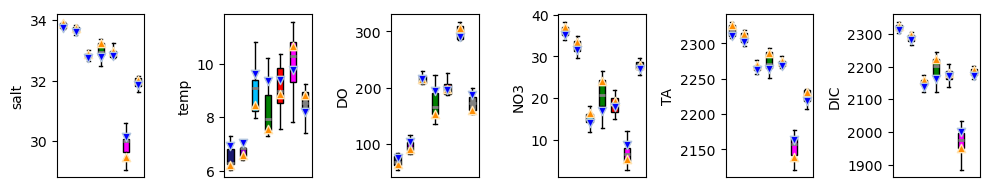

In [25]:
# box plots of the same data
# first using all the already averaged information
colours = ['midnightblue', 'darkviolet', 'deepskyblue', 'green', 'red','magenta','grey']
fig,ax = plt.subplots(1,6,figsize=(10,2))

regions = up13.regions[1:]
for i in range(len(ax)):
    bplot = box(regions,properties[i],'both',ax[i],alpha=0.5)
    for patch, color in zip(bplot['boxes'], colours):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('grey')
        median.set_linewidth(2)

    upmean =  [np.nanmean(interannual(region, properties[i], 'up')) for region in regions]
    dwmean =  [np.nanmean(interannual(region, properties[i], 'down')) for region in regions]
    ax[i].scatter(np.arange(1,len(regions)+1),upmean,marker='^',c='darkorange',edgecolors='moccasin',zorder=4)
    ax[i].scatter(np.arange(1,len(regions)+1),dwmean, marker='v',c='blue',edgecolors='lightsteelblue',zorder=4)


    # add upwelling and downwelling means

plt.tight_layout()

/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
/tmp/ipykernel_13755/967043055.py:12: FutureWarning: Calling float on a 

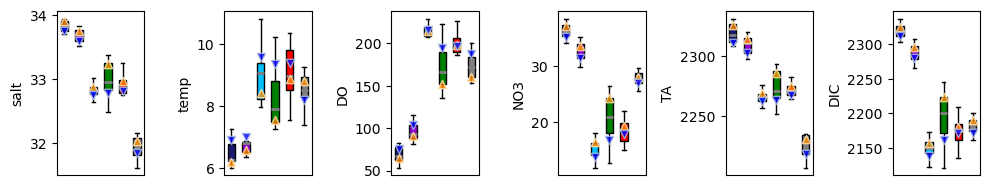

In [31]:
colours = ['midnightblue', 'darkviolet', 'deepskyblue', 'green', 'red','grey']
regions = ['cuc', 'offshore deep', 'offshore surface', 'north', 'south', 'loop']
fig,ax = plt.subplots(1,6,figsize=(10,2))
for i in range(len(ax)):
    bplot = box(regions,properties[i],'both',ax[i],alpha=0.5)
    for patch, color in zip(bplot['boxes'], colours):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('grey')
        median.set_linewidth(2)

    upmean =  [np.nanmean(interannual(region, properties[i], 'up')) for region in regions]
    dwmean =  [np.nanmean(interannual(region, properties[i], 'down')) for region in regions]
    ax[i].scatter(np.arange(1,len(regions)+1),upmean,marker='^',c='darkorange',edgecolors='moccasin',zorder=4,alpha=0.8)
    ax[i].scatter(np.arange(1,len(regions)+1),dwmean, marker='v',c='blue',edgecolors='lightsteelblue',zorder=4,alpha=0.8)


    # add upwelling and downwelling means

plt.tight_layout()

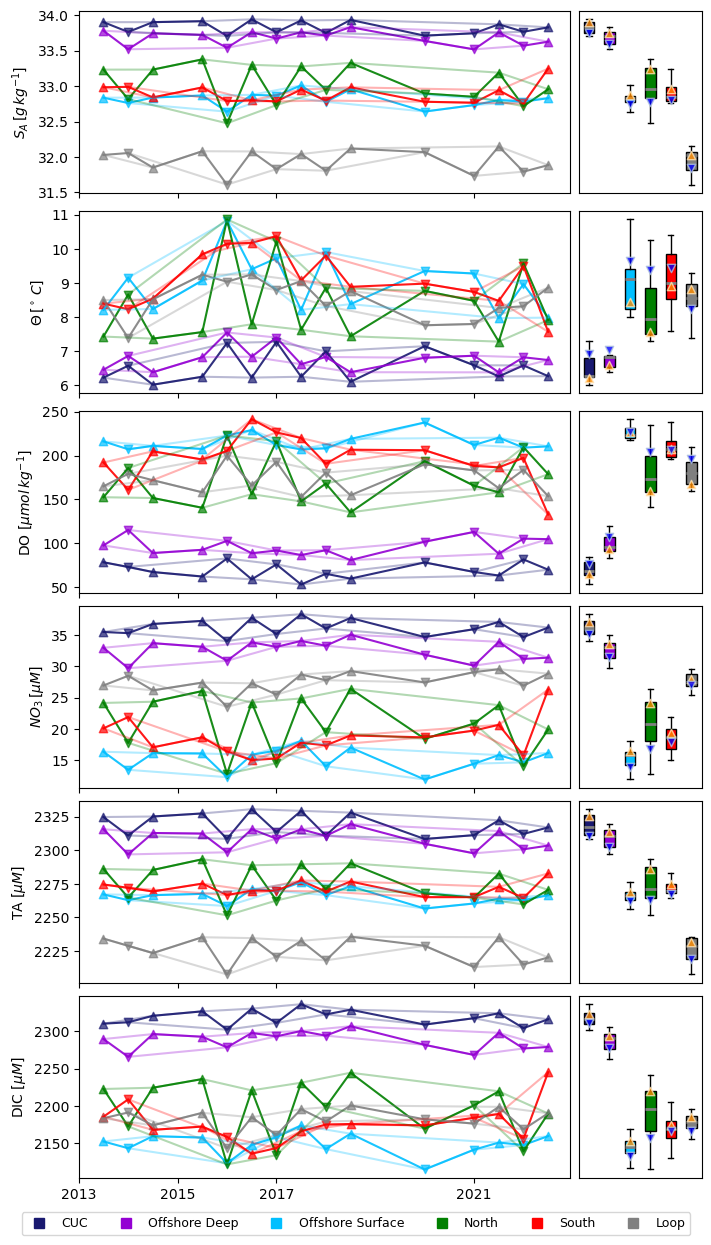

In [49]:
updownyears = np.sort(np.append(np.array(upyears)+0.5,(np.array(downyears))))
properties = ['salt','temp','DO','NO3','TA','DIC']
prop_names = ['$S_A \,[g\, kg^{-1}]$','$\Theta \,[^\circ \, C]$','DO $[\mu mol \, kg^{-1}]$','$NO_3 \, [\mu M]$','TA $[\mu M]$','DIC $[\mu M]$']

fig = plt.figure(constrained_layout=True, figsize=[7,2*6])
gs = GridSpec(6, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :4])
ax2 = fig.add_subplot(gs[0, 4])
ax3 = fig.add_subplot(gs[1, :4])
ax4 = fig.add_subplot(gs[1, 4])
ax5 = fig.add_subplot(gs[2, :4])
ax6 = fig.add_subplot(gs[2, 4])
ax7 = fig.add_subplot(gs[3, :4])
ax8 = fig.add_subplot(gs[3, 4])
ax9 = fig.add_subplot(gs[4, :4])
ax10 = fig.add_subplot(gs[4, 4])
ax11 = fig.add_subplot(gs[5, :4])
ax12 = fig.add_subplot(gs[5, 4])

# TIMESERIES
i=0
for ax in [ax1,ax3,ax5,ax7,ax9,ax11]:

    ax.plot(updownyears, interannual('cuc', properties[i], 'both'),c='midnightblue',alpha=0.9)
    ax.plot(updownyears, interannual('offshore deep', properties[i], 'both'),c='darkviolet',alpha=0.9)
    ax.plot(updownyears, interannual('offshore surface', properties[i], 'both'),c='deepskyblue',alpha=0.9)
    ax.plot(updownyears, interannual('north', properties[i], 'both'),c='green',alpha=0.9)
    ax.plot(updownyears, interannual('south', properties[i], 'both'),c='red',alpha=0.9)
    ax.plot(updownyears, interannual('loop', properties[i], 'both'),c='grey',alpha=0.9)

    ax.scatter(np.array(upyears)+0.5, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.7,marker='^')
    ax.scatter(np.array(upyears)+0.5, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.7,marker='^')
    ax.scatter(np.array(upyears)+0.5, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.7,marker='^')
    ax.scatter(np.array(upyears)+0.5, interannual('north', properties[i], 'up'),c='green',alpha=0.7,marker='^')
    ax.scatter(np.array(upyears)+0.5, interannual('south', properties[i], 'up'),c='red',alpha=0.7,marker='^')
    ax.scatter(np.array(upyears)+0.5, interannual('loop', properties[i], 'up'),c='grey',alpha=0.7,marker='^')

    ax.scatter(np.array(downyears), interannual('cuc', properties[i], 'down'),c='midnightblue',alpha=0.7,marker='v')
    ax.scatter(np.array(downyears), interannual('offshore deep', properties[i], 'down'),c='darkviolet',alpha=0.7,marker='v')
    ax.scatter(np.array(downyears), interannual('offshore surface', properties[i], 'down'),c='deepskyblue',alpha=0.7,marker='v')
    ax.scatter(np.array(downyears), interannual('north', properties[i], 'down'),c='green',alpha=0.7,marker='v')
    ax.scatter(np.array(downyears), interannual('south', properties[i], 'down'),c='red',alpha=0.7,marker='v')
    ax.scatter(np.array(downyears), interannual('loop', properties[i], 'down'),c='grey',alpha=0.7,marker='v')

    # very transparrent line jsut for connecting upwelling and downwelling respectively?
    ax.plot(np.array(upyears)+0.5, interannual('cuc', properties[i], 'up'),c='midnightblue',alpha=0.3)
    ax.plot(np.array(upyears)+0.5, interannual('offshore deep', properties[i], 'up'),c='darkviolet',alpha=0.3)
    ax.plot(np.array(upyears)+0.5, interannual('offshore surface', properties[i], 'up'),c='deepskyblue',alpha=0.3)
    ax.plot(np.array(upyears)+0.5, interannual('north', properties[i], 'up'),c='green',alpha=0.3)
    ax.plot(np.array(upyears)+0.5, interannual('south', properties[i], 'up'),c='red',alpha=0.3)
    ax.plot(np.array(upyears)+0.5, interannual('loop', properties[i], 'up'),c='grey',alpha=0.3)

    ax.plot((np.array(downyears)), interannual('cuc', properties[i], 'down'),c='midnightblue',alpha=0.3)
    ax.plot((np.array(downyears)), interannual('offshore deep', properties[i], 'down'),c='darkviolet',alpha=0.3)
    ax.plot((np.array(downyears)), interannual('offshore surface', properties[i], 'down'),c='deepskyblue',alpha=0.3)
    ax.plot((np.array(downyears)), interannual('north', properties[i], 'down'),c='green',alpha=0.3)
    ax.plot((np.array(downyears)), interannual('south', properties[i], 'down'),c='red',alpha=0.3)
    ax.plot((np.array(downyears)), interannual('loop', properties[i], 'down'),c='grey',alpha=0.3)

    ax.set_xticks(upyears[::2])
    ax.set_xticklabels([])
    ax.set_ylabel(prop_names[i])
    i+=1

ax11.set_xticklabels(upyears[::2])

# BOXPLOTS
colours = ['midnightblue', 'darkviolet', 'deepskyblue', 'green', 'red','grey']
regions = ['cuc', 'offshore deep', 'offshore surface', 'north', 'south', 'loop']
i=0
for ax in [ax2,ax4,ax6,ax8,ax10,ax12]:
    bplot = box(regions,properties[i],'both',ax,alpha=0.5)
    for patch, color in zip(bplot['boxes'], colours):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('grey')
        median.set_linewidth(2)

    upmean =  [np.nanmean(interannual(region, properties[i], 'up')) for region in regions]
    dwmean =  [np.nanmean(interannual(region, properties[i], 'down')) for region in regions]
    ax.scatter(np.arange(1,len(regions)+1),upmean,marker='^',c='darkorange',edgecolors='moccasin',zorder=4,alpha=0.8)
    ax.scatter(np.arange(1,len(regions)+1),dwmean, marker='v',c='blue',edgecolors='lightsteelblue',zorder=4,alpha=0.8)
    ax.set_yticks([])
    i+=1
# ax12.set_xticks(np.arange(1,len(regions)+1))
# ax12.set_xticklabels(regions,rotation=30,ha='right',fontsize=9)

# # build legend handles    
legend_handles = []
regionnames = ['CUC', 'Offshore Deep', 'Offshore Surface', 'North', 'South','Loop']
colours = ['midnightblue','darkviolet','deepskyblue','green','red','grey']
for i in range(len(regions)):
    legend_handles.append(mlines.Line2D([], [], 
                          marker='s', linestyle='None',markersize=7,
                          markeredgecolor=colours[i], markerfacecolor=colours[i],
                          label=regionnames[i]))
# Add a figure-wide legend below the subplots
fig.legend(handles=legend_handles, loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.0001), frameon=True,fontsize=9)

plt.savefig("/data1/bbeutel/LO_user/ariane/figures/modelpropvar.pdf", bbox_inches='tight')

In [51]:
regions

['cuc', 'offshore deep', 'offshore surface', 'north', 'south', 'loop']

In [105]:
prop='salt'
d = {'cuc': interannual('cuc', prop, 'both'),
         'offshore deep': interannual('offshore deep', prop, 'both'),
         'offshore surface':interannual('offshore surface', prop, 'both'),
         'north':interannual('north', prop, 'both'),
         'south':interannual('south', prop, 'both'),
         'loop':interannual('loop', prop, 'both'),
         'fresh':interannual('fresh', prop, 'both'),}
mydata = pd.DataFrame(d)

np.mean(mydata['cuc']) - np.mean(mydata['north'])

0.8075887738407985

In [ ]:
# statistics of combined periods
alpha = 0.05

for prop in properties:
    print(prop)
    
    # Prepare data
    d = {'cuc': interannual('cuc', prop, 'both'),
         'offshore deep': interannual('offshore deep', prop, 'both'),
         'offshore surface': interannual('offshore surface', prop, 'both'),
         'north': interannual('north', prop, 'both'),
         'south': interannual('south', prop, 'both'),
         'loop': interannual('loop', prop, 'both'),
         'fresh': interannual('fresh', prop, 'both')}
    
    mydata = pd.DataFrame(d)
    
    # Perform one-way ANOVA
    groups = [mydata[region] for region in mydata.columns]
    anova_result = stats.f_oneway(*groups)
    
    # Output ANOVA result
    if anova_result.pvalue < alpha:
        print(f"Significant differences found between regions (p = {anova_result.pvalue:.4f}) at α = {alpha}.\n")
        
        # Flatten data for Tukey test
        flattened_data = mydata.melt(var_name='region', value_name='value').dropna()
        endog = flattened_data['value']
        group_labels = flattened_data['region']
        
        # Perform Tukey HSD test
        tukey_result = pairwise_tukeyhsd(endog=endog, groups=group_labels, alpha=alpha)
        
        # Extract Tukey results into a DataFrame
        tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0]).drop(['p-adj','lower','upper'],axis=1)
        
        # Calculate Cohen's d for each pair of regions
        additional_results = []
        for _, row in tukey_df.iterrows():
            region1 = row['group1']
            region2 = row['group2']
            data1 = mydata[region1].dropna()
            data2 = mydata[region2].dropna()
            
            # Cohen's d calculation
            mean_diff = np.mean(data1) - np.mean(data2)
            pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
            cohens_d = mean_diff / pooled_std if pooled_std != 0 else np.nan
            
            additional_results.append(cohens_d)
        
        # Add Cohen's d to the DataFrame
        tukey_df['Cohen\'s d'] = additional_results
        print("Tukey HSD post hoc results with Cohen's d:")
        print(tukey_df)
    else:
        print(f"No significant differences between regions (p = {anova_result.pvalue:.8f}) at α = {alpha}.")
    print('\n')


salt
Significant differences found between regions (p = 0.0000) at α = 0.05.

Tukey HSD post hoc results with Cohen's d:
              group1            group2  meandiff  reject  Cohen's d
0                cuc             fresh   -4.0559    True   8.904002
1                cuc              loop   -1.8883    True  14.327603
2                cuc             north   -0.8076    True   3.961323
3                cuc     offshore deep   -0.1516   False   1.588426
4                cuc  offshore surface   -1.0150    True  10.754884
5                cuc             south   -0.9369    True   8.210537
6              fresh              loop    2.1676    True  -4.651732
7              fresh             north    3.2483    True  -6.612194
8              fresh     offshore deep    3.9042    True  -8.542448
9              fresh  offshore surface    3.0409    True  -6.656729
10             fresh             south    3.1190    True  -6.761425
11              loop             north    1.0807    True  -4.77

In [107]:
# statistics of upwelling
alpha = 0.05

for prop in properties:
    print(prop)
    
    # Prepare data
    d = {'cuc': interannual('cuc', prop, 'up'),
         'offshore deep': interannual('offshore deep', prop, 'up'),
         'offshore surface': interannual('offshore surface', prop, 'up'),
         'north': interannual('north', prop, 'up'),
         'south': interannual('south', prop, 'up'),
         'loop': interannual('loop', prop, 'up'),
         'fresh': interannual('fresh', prop, 'up')}
    
    mydata = pd.DataFrame(d)
    
    # Perform one-way ANOVA
    groups = [mydata[region] for region in mydata.columns]
    anova_result = stats.f_oneway(*groups)
    
    # Output ANOVA result
    if anova_result.pvalue < alpha:
        print(f"Significant differences found between regions (p = {anova_result.pvalue:.4f}) at α = {alpha}.\n")
        
        # Flatten data for Tukey test
        flattened_data = mydata.melt(var_name='region', value_name='value').dropna()
        endog = flattened_data['value']
        group_labels = flattened_data['region']
        
        # Perform Tukey HSD test
        tukey_result = pairwise_tukeyhsd(endog=endog, groups=group_labels, alpha=alpha)
        
        # Extract Tukey results into a DataFrame
        tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0]).drop(['p-adj','lower','upper'],axis=1)
        
        # Calculate Cohen's d for each pair of regions
        additional_results = []
        for _, row in tukey_df.iterrows():
            region1 = row['group1']
            region2 = row['group2']
            data1 = mydata[region1].dropna()
            data2 = mydata[region2].dropna()
            
            # Cohen's d calculation
            mean_diff = np.mean(data1) - np.mean(data2)
            pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
            cohens_d = mean_diff / pooled_std if pooled_std != 0 else np.nan
            
            additional_results.append(cohens_d)
        
        # Add Cohen's d to the DataFrame
        tukey_df['Cohen\'s d'] = additional_results
        print("Tukey HSD post hoc results with Cohen's d:")
        print(tukey_df)
    else:
        print(f"No significant differences between regions (p = {anova_result.pvalue:.8f}) at α = {alpha}.")
    print('\n')


salt
Significant differences found between regions (p = 0.0000) at α = 0.05.

Tukey HSD post hoc results with Cohen's d:
              group1            group2  meandiff  reject  Cohen's d
0                cuc             fresh   -4.4309    True   8.527163
1                cuc              loop   -1.8751    True  23.390548
2                cuc             north   -0.6667    True   7.062213
3                cuc     offshore deep   -0.1550   False   3.158151
4                cuc  offshore surface   -1.0267    True  18.273824
5                cuc             south   -0.9376    True   9.587021
6              fresh              loop    2.5558    True  -4.873245
7              fresh             north    3.7642    True  -7.145218
8              fresh     offshore deep    4.2759    True  -8.213473
9              fresh  offshore surface    3.4042    True  -6.529936
10             fresh             south    3.4933    True  -6.623194
11              loop             north    1.2084    True -10.23

In [108]:
# statistics of downwelling
alpha = 0.05

for prop in properties:
    print(prop)
    
    # Prepare data
    d = {'cuc': interannual('cuc', prop, 'down'),
         'offshore deep': interannual('offshore deep', prop, 'down'),
         'offshore surface': interannual('offshore surface', prop, 'down'),
         'north': interannual('north', prop, 'down'),
         'south': interannual('south', prop, 'down'),
         'loop': interannual('loop', prop, 'down'),
         'fresh': interannual('fresh', prop, 'down')}
    
    mydata = pd.DataFrame(d)
    
    # Perform one-way ANOVA
    groups = [mydata[region] for region in mydata.columns]
    anova_result = stats.f_oneway(*groups)
    
    # Output ANOVA result
    if anova_result.pvalue < alpha:
        print(f"Significant differences found between regions (p = {anova_result.pvalue:.4f}) at α = {alpha}.\n")
        
        # Flatten data for Tukey test
        flattened_data = mydata.melt(var_name='region', value_name='value').dropna()
        endog = flattened_data['value']
        group_labels = flattened_data['region']
        
        # Perform Tukey HSD test
        tukey_result = pairwise_tukeyhsd(endog=endog, groups=group_labels, alpha=alpha)
        
        # Extract Tukey results into a DataFrame
        tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0]).drop(['p-adj','lower','upper'],axis=1)
        
        # Calculate Cohen's d for each pair of regions
        additional_results = []
        for _, row in tukey_df.iterrows():
            region1 = row['group1']
            region2 = row['group2']
            data1 = mydata[region1].dropna()
            data2 = mydata[region2].dropna()
            
            # Cohen's d calculation
            mean_diff = np.mean(data1) - np.mean(data2)
            pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
            cohens_d = mean_diff / pooled_std if pooled_std != 0 else np.nan
            
            additional_results.append(cohens_d)
        
        # Add Cohen's d to the DataFrame
        tukey_df['Cohen\'s d'] = additional_results
        print("Tukey HSD post hoc results with Cohen's d:")
        print(tukey_df)
    else:
        print(f"No significant differences between regions (p = {anova_result.pvalue:.8f}) at α = {alpha}.")
    print('\n')


salt
Significant differences found between regions (p = 0.0000) at α = 0.05.

Tukey HSD post hoc results with Cohen's d:
              group1            group2  meandiff  reject  Cohen's d
0                cuc             fresh   -3.6273    True  20.238110
1                cuc              loop   -1.9032    True  15.975972
2                cuc             north   -0.9686    True   8.667376
3                cuc     offshore deep   -0.1479   False   2.558092
4                cuc  offshore surface   -1.0016    True  16.722738
5                cuc             south   -0.9360    True  15.656771
6              fresh              loop    1.7241    True  -8.062268
7              fresh             north    2.6587    True -12.671295
8              fresh     offshore deep    3.4795    True -18.631126
9              fresh  offshore surface    2.6257    True -14.010060
10             fresh             south    2.6913    True -14.362744
11              loop             north    0.9346    True  -5.78

In [9]:
# salt
property = 'salt'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


salt
cuc
UP: mean =33.90370901995284, std =0.03485623717498826, CV = 0.0010280951017623127
DOWN: mean =33.74433356623391, std =0.02243201192317851, CV = 0.0006647638152091107
UP & DOWN: mean =33.829333808217335, std =0.08488057853978925, CV = 0.0025090821776446357


offshore deep
UP: mean =33.74875416183394, std =0.054753596188183005, CV = 0.0016223886643526291
DOWN: mean =33.59648236153656, std =0.07227346005918758, CV = 0.002151221049913575
UP & DOWN: mean =33.677693988361824, std =0.09903248824473178, CV = 0.0029405958816228614


offshore surface
UP: mean =32.87700105053676, std =0.0656451737354346, CV = 0.001996689832948217
DOWN: mean =32.74272095496974, std =0.07514455620677608, CV = 0.0022950003547390135
UP & DOWN: mean =32.81433700593881, std =0.09706269868782759, CV = 0.0029579356934824243


north
UP: mean =33.236996489651304, std =0.11992405355031988, CV = 0.003608149538652192
DOWN: mean =32.775743371205365, std =0.14458697487489863, CV = 0.004411401847926456
UP & DOWN: mean =

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


In [10]:
# temp
property = 'temp'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


temp
cuc
UP: mean =6.202812952895419, std =0.08447587130615394, CV = 0.013618961582054693
DOWN: mean =6.91700398526138, std =0.2996754547615885, CV = 0.0433244588842411
UP & DOWN: mean =6.536102101332869, std =0.4155305041318243, CV = 0.06357466540296051


offshore deep
UP: mean =6.580459759139156, std =0.18874982422612582, CV = 0.02868337944989086
DOWN: mean =7.0213484794293, std =0.2908777542566979, CV = 0.04142761965296168
UP & DOWN: mean =6.786207828607891, std =0.3269023369973553, CV = 0.04817157759585082


offshore surface
UP: mean =8.434065042694712, std =0.487686494627199, CV = 0.057823421109328026
DOWN: mean =9.59890396044074, std =0.5796511896010258, CV = 0.060387226707330315
UP & DOWN: mean =8.97765653764286, std =0.7882573893065666, CV = 0.08780213255000827


north
UP: mean =7.55227550869787, std =0.20242860019758796, CV = 0.02680365672100458
DOWN: mean =9.344990485675337, std =0.8365329682283301, CV = 0.08951672765324128
UP & DOWN: mean =8.388875831287354, std =1.071591277

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


In [11]:
# DO
property = 'DO'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


DO
cuc
UP: mean =64.17348207419872, std =7.237978236284573, CV = 0.1127876811782766
DOWN: mean =74.95936237352734, std =6.2263286927355415, CV = 0.08306272219485197
UP & DOWN: mean =69.20689288055206, std =8.659464749273674, CV = 0.12512431043855002


offshore deep
UP: mean =91.09608022309214, std =6.834486672951141, CV = 0.07502503572287243
DOWN: mean =103.19736467688163, std =8.440947688629636, CV = 0.08179421746920428
UP & DOWN: mean =96.74334630152723, std =9.726740582703888, CV = 0.10054170084615255


offshore surface
UP: mean =215.076405208462, std =7.096866896356224, CV = 0.03299695700919686
DOWN: mean =215.55140723784172, std =10.234442587072948, CV = 0.047480286573959384
UP & DOWN: mean =215.29807282217251, std =8.706216950985096, CV = 0.040437969726631405


north
UP: mean =152.59806449421106, std =12.242724081936185, CV = 0.08022856726600633
DOWN: mean =194.5830425085584, std =21.108623209582653, CV = 0.10848130925208566
UP & DOWN: mean =172.19105423423983, std =26.9554967900

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


In [12]:
# NO3
property = 'NO3'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


NO3
cuc
UP: mean =37.07186061719679, std =0.8578488095084332, CV = 0.023140160629285943
DOWN: mean =35.11632309193237, std =0.6686345250537356, CV = 0.01904056194332452
UP & DOWN: mean =36.15927643874007, std =1.2461536123591117, CV = 0.03446290233352171


offshore deep
UP: mean =33.497816384577824, std =0.9978798435180357, CV = 0.02978939976450086
DOWN: mean =31.444871324891324, std =1.2837839293982993, CV = 0.04082649650984813
UP & DOWN: mean =32.539775356724114, std =1.5326940651314984, CV = 0.04710217106077157


offshore surface
UP: mean =16.43120554907716, std =0.7151798590478714, CV = 0.0435257082574832
DOWN: mean =13.89939514027262, std =1.4407077534839448, CV = 0.10365255026886637
UP & DOWN: mean =15.249694024968372, std =1.6842849137805675, CV = 0.11044712838322412


north
UP: mean =24.212471201421316, std =1.8477781502686614, CV = 0.07631514085849253
DOWN: mean =16.840564109972092, std =2.8228309737335597, CV = 0.16762092738105064
UP & DOWN: mean =20.77224789207834, std =4.36

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


In [13]:
# TA
property = 'TA'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


TA
cuc
UP: mean =2325.509649379553, std =4.0856374798919255, CV = 0.0017568783173967802
DOWN: mean =2310.788670342295, std =1.7299504452121375, CV = 0.0007486406989159599
UP & DOWN: mean =2318.6398591621664, std =8.014690141571737, CV = 0.0034566343323657956


offshore deep
UP: mean =2313.6376042069287, std =4.35196191554276, CV = 0.001881004141542958
DOWN: mean =2302.545363390156, std =5.112225663643251, CV = 0.0022202497049249263
UP & DOWN: mean =2308.4612251591016, std =7.274621100904922, CV = 0.0031512858096213194


offshore surface
UP: mean =2269.0532223965483, std =3.820513373522369, CV = 0.0016837478009824672
DOWN: mean =2262.5304932749395, std =4.212606075105878, CV = 0.0018619002429480043
UP & DOWN: mean =2266.0092821397975, std =5.162888798359728, CV = 0.0022784058472542536


north
UP: mean =2285.811509403329, std =6.552453933183404, CV = 0.002866576664885989
DOWN: mean =2263.239627710135, std =5.824664385460374, CV = 0.0025735959701949727
UP & DOWN: mean =2275.2779646131717,

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]


In [14]:
# DIC
property = 'DIC'
print(property)
for region in regions:
    print(region)
    x = interannual(region, property, 'up')
    print("UP: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'down')
    print("DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    x = interannual(region, property, 'both')
    print("UP & DOWN: mean ={}, std ={}, CV = {}".format(np.nanmean(x),np.nanstd(x),np.nanstd(x)/np.nanmean(x)))
    print('\n')


DIC
cuc
UP: mean =2324.233987380426, std =7.786337381784828, CV = 0.0033500660536164755
DOWN: mean =2311.3323952829514, std =6.60543560263531, CV = 0.002857847541148091
UP & DOWN: mean =2318.213244401604, std =9.701739415794334, CV = 0.0041850073280461425


offshore deep
UP: mean =2295.119164857383, std =7.71926118892903, CV = 0.0033633378637264347
DOWN: mean =2279.91453417772, std =10.210648936729767, CV = 0.004478522674277511
UP & DOWN: mean =2288.0236705402067, std =11.746126661005327, CV = 0.005133743506347574


offshore surface
UP: mean =2158.1983276388314, std =7.622402865662947, CV = 0.0035318361468670988
DOWN: mean =2138.837483348369, std =13.657550683870042, CV = 0.006385501839293103
UP & DOWN: mean =2149.163266969949, std =14.537125484932252, CV = 0.00676408614847944


north
UP: mean =2223.7337007058577, std =15.051152681274948, CV = 0.006768415065390883
DOWN: mean =2162.518627308061, std =29.124646873485197, CV = 0.013467928787156873
UP & DOWN: mean =2195.166666453552, std =

/tmp/ipykernel_167623/967043055.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[i] = file[property][file.regions == region]
